# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [62]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [63]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
  
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(city)
        print(f'Processing Record {len(city_name)} | {city}')
    except (KeyError, IndexError):
        print("City not found. Skipping...")

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 | qaanaaq
Processing Record 2 | ushuaia
Processing Record 3 | riyadh
Processing Record 4 | khatanga
Processing Record 5 | bluff
Processing Record 6 | rikitea
Processing Record 7 | thinadhoo
Processing Record 8 | port alfred
Processing Record 9 | hobart
Processing Record 10 | bengkulu
Processing Record 11 | zeya
Processing Record 12 | matara
Processing Record 13 | jamestown
City not found. Skipping...
Processing Record 14 | mataura
Processing Record 15 | cockburn town
City not found. Skipping...
Processing Record 16 | vardo
Processing Record 17 | albany
Processing Record 18 | zakamensk
Processing Record 19 | wadi maliz
Processing Record 20 | klyuchi
Processing Record 21 | ginir
Processing Record 22 | bangkalan
Processing Record 23 | barrow
Processing Record 24 | kahului
Processing Record 25 | vaini
Processing Record 26 | denpasar
Processing Record 27 | ketchikan
Processing Record 28 | marienburg
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [74]:
city_dict = {"City": city_name, "Lat": lat, "Lng": lng,
                "Max Temp": max_temp, "Humidity": humidity, 
                "Cloudiness" : cloudiness, "Wind Speed": wind_speed,
                "Country": country, "Date": date}
city_data = pd.DataFrame(city_dict)
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaanaaq,77.4840,-69.3632,16.09,65,60,7.76,GL,1630971841
1,ushuaia,-54.8000,-68.3000,44.26,76,40,12.66,AR,1630971754
2,riyadh,24.6877,46.7219,86.14,13,0,3.44,SA,1630971841
3,khatanga,71.9667,102.5000,53.29,67,93,8.57,RU,1630971843
4,bluff,-46.6000,168.3333,50.81,90,100,6.33,NZ,1630971843


In [115]:
city_data.to_csv("output_data/cities.csv", index=False)

In [86]:
city_data.sort_values(by='Humidity', ascending=False).head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
209,floro,61.5996,5.0328,57.96,100,90,17.27,NO,1630971930
357,yarada,17.6500,83.2667,77.32,100,90,6.91,IN,1630971992
516,lashio,22.9333,97.7500,68.16,100,95,0.56,MM,1630972060
208,mar del plata,-38.0023,-57.5575,51.82,100,75,10.36,AR,1630971923
264,bilibino,68.0546,166.4372,34.27,100,100,2.26,RU,1630971953
270,havre-saint-pierre,50.2334,-63.5986,55.76,100,90,8.05,CA,1630971955
309,aanekoski,62.6946,25.8180,43.86,100,93,5.14,FI,1630971971
82,salalah,17.0151,54.0924,78.89,100,90,0.00,OM,1630971876
107,champasak,14.7500,106.0000,73.94,99,100,1.86,LA,1630971886
557,mobaye,4.3190,21.1786,68.68,99,100,2.48,CF,1630972077


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
# no cities with > 100% humidty 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

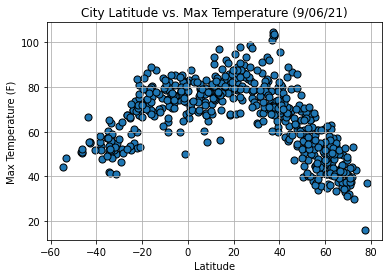

In [87]:
city_data.plot.scatter(x='Lat', y='Max Temp', s=50, facecolor='c', edgecolor='k', grid=True)
plt.title("City Latitude vs. Max Temperature (9/06/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig('output_data/Latitude vs. Temperature Plot.png')

## Latitude vs. Humidity Plot

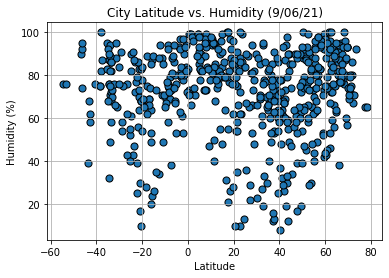

In [88]:
city_data.plot.scatter(x='Lat', y='Humidity', s=50, facecolor='c', edgecolor='k', grid=True)
plt.title("City Latitude vs. Humidity (9/06/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('output_data/Latitude vs. Humidity Plot.png')

## Latitude vs. Cloudiness Plot

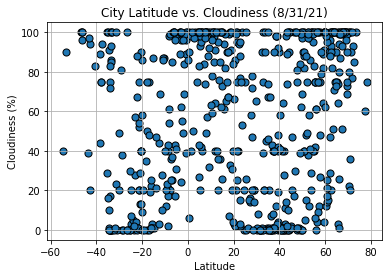

In [89]:
city_data.plot.scatter(x='Lat', y='Cloudiness', s=50, facecolor='c', edgecolor='k', grid=True)
plt.title("City Latitude vs. Cloudiness (8/31/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('output_data/Latitude vs. Cloudiness Plot.png')

## Latitude vs. Wind Speed Plot

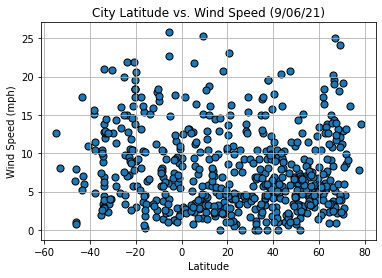

In [90]:
city_data.plot.scatter(x='Lat', y='Wind Speed', s=50, facecolor='c', edgecolor='k', grid=True)
plt.title("City Latitude vs. Wind Speed (9/06/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('output_data/Latitude vs. Wind Speed Plot.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5795137274625272


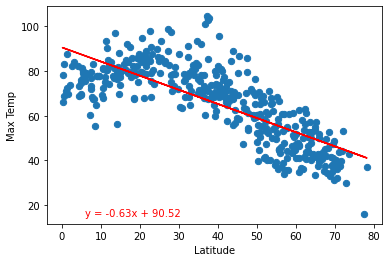

In [103]:
north_hem = city_data.loc[city_data['Lat'] >= 0]

x_values = north_hem['Lat']
y_values = north_hem['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

north_hem.plot.scatter(x='Lat', y='Max Temp', s=40)

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,15), color='red')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5823760777137923


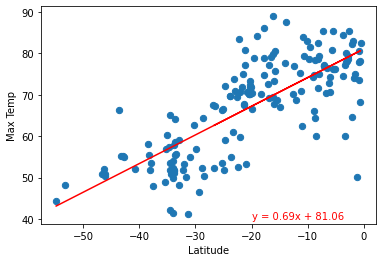

In [104]:
south_hem = city_data.loc[city_data['Lat'] < 0]

x_values = south_hem['Lat']
y_values = south_hem['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

south_hem.plot.scatter(x='Lat', y='Max Temp', s=40)

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-20,40), color='red')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0010311120258667734


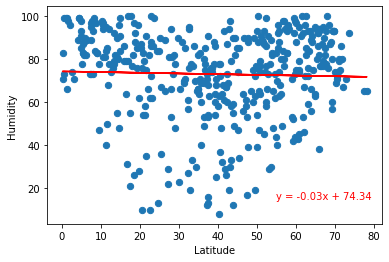

In [105]:
north_hem = city_data.loc[city_data['Lat'] >= 0]

x_values = north_hem['Lat']
y_values = north_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

north_hem.plot.scatter(x='Lat', y='Humidity', s=40)

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(55,15), color='red')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0004855749884627676


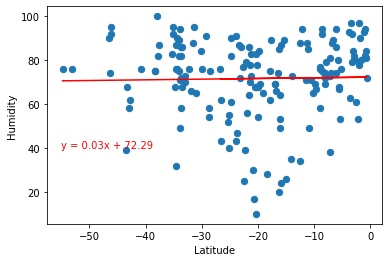

In [107]:
south_hem = city_data.loc[city_data['Lat'] < 0]

x_values = south_hem['Lat']
y_values = south_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

south_hem.plot.scatter(x='Lat', y='Humidity', s=40)

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-55,40), color='red')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0015423911938533387


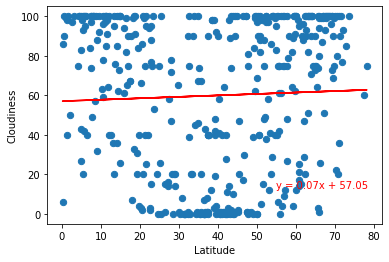

In [108]:
north_hem = city_data.loc[city_data['Lat'] >= 0]

x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

north_hem.plot.scatter(x='Lat', y='Cloudiness', s=40)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(55,13), color='red')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.00833253052614457


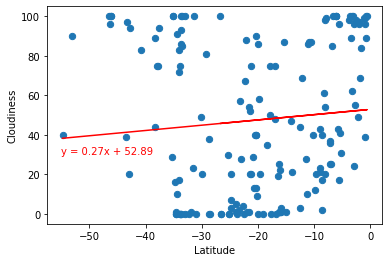

In [109]:
south_hem = city_data.loc[city_data['Lat'] < 0]

x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

south_hem.plot.scatter(x='Lat', y='Cloudiness', s=40)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-55,30), color='red')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0026111126296391204


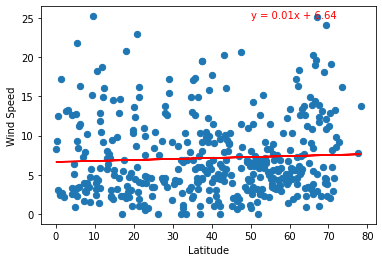

In [110]:
north_hem = city_data.loc[city_data['Lat'] >= 0]

x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

north_hem.plot.scatter(x='Lat', y='Wind Speed', s=40)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(50,25), color='red')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0078001349065825116


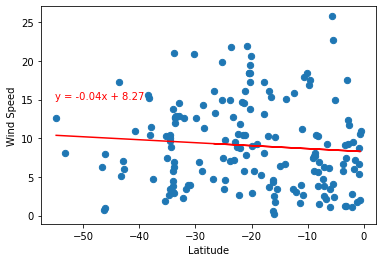

In [111]:
south_hem = city_data.loc[city_data['Lat'] < 0]

x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

south_hem.plot.scatter(x='Lat', y='Wind Speed', s=40)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-55,15), color='red')
print(f"The r-value is: {rvalue**2}")
plt.show()

# Analysis:

In [ ]:
#There seems to be more data available in the northern hemisphere, therefore the linear regression seems to be more
#aligned with the data. 

#The data that correlates the most with the latitude is the Max Temp, this makes sense as the temperature generally
#rises the closer the city is to the equator. 

#The data that is least correlated to the latitude is the Cloudiness, there seems to be other factors that play in
#to how cloudy a city is other than the latitude. 